# LSTM gates and formulas
![General Overview](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)
![LSTM Gates](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)
[Source](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

# [Reading data](https://archive.ics.uci.edu/ml/datasets/Daily+Demand+Forecasting+Orders#)

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv',
                   sep=';')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [2]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [3]:
#checking missing values
df.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

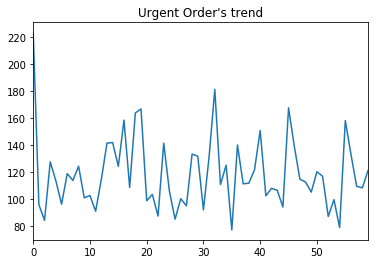

In [4]:
df['Urgent order'].plot(title='Urgent Order\'s trend')

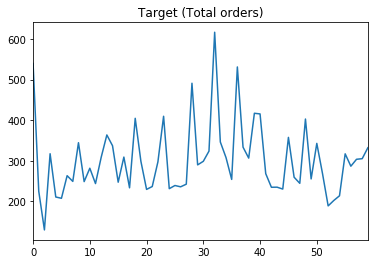

In [5]:
df['Target (Total orders)'].plot(title='Target (Total orders)')

# Possible baseline(s)
* previous time step

**What other baselines you can think of?**

In [6]:
import numpy as np
base_line1 = np.array(np.nan)
base_line1 = np.append(base_line1, df['Urgent order'][:-1].values)
base_line1

array([    nan, 223.27 ,  96.042,  84.375, 127.667, 113.526,  96.36 ,
       118.919, 113.87 , 124.381, 101.045, 102.793,  91.18 , 114.412,
       141.406, 141.854, 124.256, 158.408, 108.688, 163.72 , 166.649,
        98.927, 103.551,  87.629, 141.437, 106.083,  85.31 , 100.417,
        95.153, 133.375, 131.788,  92.16 , 131.463, 181.149, 110.874,
       125.119,  77.371, 140.041, 111.392, 111.859, 121.697, 150.708,
       102.53 , 108.055, 106.641,  94.315, 167.455, 139.383, 114.813,
       112.703, 105.273, 120.324, 116.959,  87.294,  99.756,  79.084,
       158.133, 133.069, 109.639, 108.395])

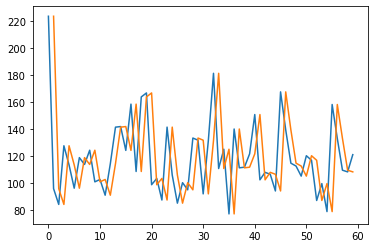

In [7]:
import matplotlib.pyplot as plt
plt.plot(df['Urgent order'].values)
plt.plot(base_line1)
plt.show()

# LSTM model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
previous_steps = 5
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(previous_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
def split_series(t_series, previous_steps):
    X, y = list(), list()
    for i in range(len(t_series)):
        # end of the pattern
        end_ix = i + previous_steps
        # Don't exceed the end of the series!
        if end_ix > len(t_series)-1:
            break
        # input , output in an  autoregressive manner
        seq_x, seq_y = t_series[i:end_ix], t_series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
X, y = split_series(df['Urgent order'].values, previous_steps)
# change the shape for the LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

In [17]:
model.fit(X, y, epochs=200, verbose=0)

In [12]:
x_test = np.array(df['Urgent order'][0:5].values)

In [13]:
x_input = x_test.reshape((1, previous_steps, 1))

In [14]:
# our prediction
yhat = model.predict(x_input, verbose=0)
print(yhat[0])

[93.941284]


In [15]:
# Ground truth
y = df['Urgent order'][5]
print(y)

96.36


# Lab Exercises

* Write a for loop to predict the number of urgent orders for all the of the time steps using LSTM.

* Find RMSE of your prediction and compare it with the RMSR of the baseline1.

* How can you improve the accuracy of the LSTM? (hint: play with different parameter's setting)?

* Define at least 1 more baseline and compare your result with it. 

In [34]:
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, LSTM
previous_steps = 3
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(previous_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# sliding window
whole_series = df['Urgent order'].values
length_ = len(whole_series)
yhat_ = []
y_ = []
baseline1 = []
baseline2 = []
for i in tqdm(range(previous_steps, length_-1), position = 0, leave=True):
    X, y = split_series(whole_series[:i+1], previous_steps)
    # change the shape for the LSTM input
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    model.fit(X, y, epochs=100, verbose=0)
    
    x_test = np.array(whole_series[(i-previous_steps+1):(i+1)]) #last 5 steps
    x_input = x_test.reshape((1, previous_steps, 1))
    
    # our prediction
    yhat_.append(model.predict(x_input, verbose=0)[0][0])
    y_.append(whole_series[i+1]) # ground truth
    baseline1.append(whole_series[i]) # last time step
    baseline2.append((whole_series[i]+whole_series[i-1])/2) # average of the last two time steps

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:29<00:00,  1.91it/s]


In [35]:
RMSE_LSTM = np.sqrt(sum((np.array(yhat_) - np.array(y_))**2)/len(y_))
RMSE_baselie1 = np.sqrt(sum((np.array(baseline1) - np.array(y_))**2)/len(y_))
RMSE_baselie2 = np.sqrt(sum((np.array(baseline2) - np.array(y_))**2)/len(y_))

print("LSTM\'s RMSE is {}.".format(round(RMSE_LSTM, 2)))
print("RMSE of last time step as baseline1 is {}.".format(round(RMSE_baselie1, 2)))
print("RMSE of the average of the last two time steps as baseline2 is {}.".format(round(RMSE_baselie2, 2)))

LSTM's RMSE is 32.85.
RMSE of last time step as baseline1 is 32.33.
RMSE of the average of the last two time steps as baseline2 is 29.21.
